In [1]:
from pynq import Overlay, allocate
from pynq.lib.video import *
from itek import *
from time import sleep, time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ol = Overlay("vdma_zcu104.bit")

In [3]:
uart = ol.axi_uartlite_0
CLRX = ol.CameraLinkRX_0
vdma = ol.axi_vdma_0
timer = ol.axi_timer_0
camera = PNCL(uart)

### Config VDMA

In [4]:
WIDTH = 4096
HEIGHT = 1
STRIDE = 4096
vdma.readchannel.stop()
vdma.readchannel.mode = VideoMode(width=WIDTH, height=HEIGHT, bits_per_pixel=32, fps=100000, stride=STRIDE)
vdma.readchannel.start()

### Config Camera

In [5]:
config = {
    "sync": 0,        # Set Synchronization Mode (0/1/2: Free Run/External Pulse/External PWM)
    "clnk": 0,        # Set Camera Link Mode (0 to 6: 2tap@8bit/4tap@8bit/8tap@8bit/10tap@8bit/2tap@10bit/4tap@10bit/8tap@10bit)
    "tprd": 10000,     # Set Line Period Time in microsecond (49.00us to 64000us)
    "lrps": 100,     # Set LineRate (15.63 to 20409.00)
    "texp": 400,      # Set Expsoure Time in microsecond (3.500000us to 64000.000000us)
    "dmod": 0,        # Set Data Mode (0/1/2/3: Original/Corrected/Test Pattern1/Test Pattern2)
    "hdir": 0,        # Set Horizontal Scan Direction (0/1: Left to Right/Right to Left)
    "binn": 0,        # Set Horizontal Binning Mode (0/1: 1x1/2x1)
    "dign": 1,        # Set Digital Gain (x0.01 to x8)
    "dios": 0,        # Set Digital Offset (-1023 to 1023)
    "ffcr": 0,        # Flat Field Correction (0/1 Disable/Enable)
    "ffcm": 0,        # Set Flat Field Calibration Mode (0/1 Disable/Enable Calibration Reference)
    "sroi": 0,        # Set Region of Interest (0/1: Disable/Enable)
    "lscr": 0,        # Set Line Spatial Correction Mode (0/1: Disable/Enable)
    "doff": 2,        # Set Black Level (0 to 1023)
    "angn": 1,        # Set Analog Gain (1~8: x1~x8)
}

# camera.load(CONFIG_MAX_SPEED)
camera.load(config)

Setting sync=0 >Ok
Setting clnk=0 >Ok
Setting tprd=10000 >Ok
Setting lrps=100 >Ok
Setting texp=400 >Ok
Setting dmod=0 >Ok
Setting hdir=0 >Ok
Setting binn=0 >Ok
Setting dign=1 >Ok
Setting dios=0 >Ok
Setting ffcr=0 >Ok
Setting ffcm=0 >Ok
Setting sroi=0 >Ok
Setting lscr=0 >Ok
Setting doff=2 >Ok
Setting angn=1 >Ok


### Config the AXI Timer to run in PWM mode

In [6]:
PWM_PERIOD = 25000  # number of clocks
PWM_HIGH_TIME = PWM_PERIOD >> 1
TLR0 = PWM_PERIOD - 2
TLR1 = PWM_HIGH_TIME - 2
TCSR0 = 0x0606
TCSR1 = 0x0606
timer.write(0x4, TLR0)
timer.write(0x14, TLR1)
timer.write(0x0, TCSR0)
timer.write(0x10, TCSR1)

### Config the CameraLinkRX to use external trigger or external PWM

In [7]:
# External Trigger
# CLRX.write(0x0, 0x3)

# External PWM
CLRX.write(0x0, 0x1)

### Read one frame and plot

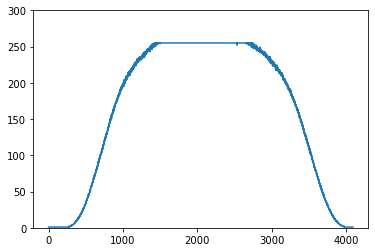

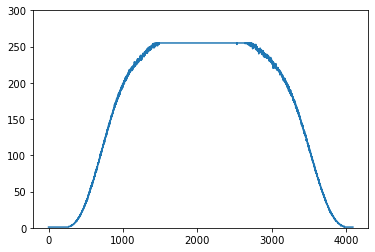

In [12]:
frame = vdma.readchannel.readframe()

plt.figure()
plt.ylim((0, 300))
plt.plot(frame[0, :, 0])
plt.figure()
plt.ylim((0, 300))
plt.plot(frame[0, :, 1])

In [ ]:
N_frame = 1000
t_start = time()
for i in range(N_frame):
    frame = vdma.readchannel.readframe()
t_end = time()
t_second = t_end - t_start
fps = N_frame / t_second
print("FPS:", fps)

### Stop VDMA before exit

In [ ]:
vdma.readchannel.stop()